## **Time Series Analysis Task Notebook**

This notebook is designed to test you through various Time Series Analysis tasks using the Bike Sharing dataset. The tasks will help you develop essential skills in handling time-based data, including cleaning and preprocessing, feature engineering, and model building. You'll explore techniques such as creating lag and rolling window features, implementing linear regression for time series prediction, and applying XGBoost with hyperparameter tuning. Finally, you'll evaluate and compare the performance of the models, providing insights into their effectiveness. These tasks will enhance your understanding of time series analysis and prepare you for real-world forecasting challenges.

# **About the Dataset**
The Bike Sharing Dataset contains information about bike rental counts in the city of Washington, D.C., recorded at hourly intervals. The dataset provides data on various factors that influence bike rentals, including weather conditions, time of day, and seasonal factors. It includes several features such as temperature, humidity, wind speed, and day of the week, which can be used for building predictive models to forecast bike rental demand.

The dataset spans multiple years and captures the number of bikes rented at each hour of the day, making it ideal for time series analysis. By leveraging this data, you can explore patterns in bike rentals over time, uncover seasonality, and implement models for predicting future rental demand.





## **Key Attributes in the Dataset:**

**instant:** Record index.

**dteday:** Date of the observation.

**season:** The season (1: Spring, 2: Summer, 3: Fall, 4: Winter).

**yr:** Year (0: 2011, 1: 2012).

**mnth:** Month of the year (1 to 12).

**hour:** Hour of the day (0 to 23).

**holiday:** Whether the day is a holiday (1: Yes, 0: No).

**weekday:** Day of the week (0 to 6).

**workingday:** Whether it's a working day (1: Yes, 0: No).

**weathersit:** Weather condition (1: Clear, 2: Mist, 3: Light Rain, 4: Heavy Rain).

**temp:** Temperature (normalized).

**hum:** Humidity (normalized).

**windspeed:** Wind speed (normalized).

**cnt:** The total number of bike rentals at that hour.

This dataset offers a comprehensive set of features to explore and analyze bike-sharing patterns, making it an excellent resource for time series forecasting tasks.

## **Exercise**

1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset) from Kaggle. Use the "hour.csv" file.
2. Visualize the structure of the dataset using appropriate libraries and plots.
3. Clean and pre-process the dataset as required and prepare the data for modelling.
4. Create the lag and rolling windows features for the "cnt" column such as: 1 day lag, 1 week lag, 1 month, etc. and last 3 day rolling mean, last 3 hours rolling mean, etc. But it should be based on your dataset and what makes sense for this dataset.
5. Implement linear regression to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
6. Implement XGBoost to predict how many bikes will be rented each hour of the last week and evaluate using appropriate metrics.
7. Experiment with predicting different time periods, such as use all data to predict bike rentals for just the next day (24 hours) or the next entire month and then see how much better or worse the model gets
8. Experiment tuning hyperparameters

**Bonus task (Optional)**

This tasks is not mandatory, but it is designed for those who want to challenge themselves, enhance their critical thinking skills, or dive deeper into the topic. If you're eager to learn more or test your understanding, this task can provide additional learning opportunities.
1. Modelling: Implement an ARIMA model, evaluate it using relevant plots and provide a summary analysis .
  


In [192]:
import os
import kagglehub

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [193]:
# Download latest version
path = kagglehub.dataset_download("lakshmi25npathi/bike-sharing-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hassan\.cache\kagglehub\datasets\lakshmi25npathi\bike-sharing-dataset\versions\1


In [194]:
dataset_path = "C:\\Users\\Hassan\\.cache\\kagglehub\\datasets\\lakshmi25npathi\\bike-sharing-dataset\\versions\\1"

files = os.listdir(dataset_path)
print(files)


['day.csv', 'hour.csv', 'Readme.txt']


In [195]:
file_path = "C:\\Users\\Hassan\\.cache\\kagglehub\\datasets\\lakshmi25npathi\\bike-sharing-dataset\\versions\\1\\hour.csv"
df = pd.read_csv(file_path)
#no n/a
#df.info() 
#df['dteday'].describe()


In [196]:
og_df = df.copy()

df['dteday+hr'] = df['dteday'].astype(str) + ' ' + df['hr'].apply(lambda x: f'{x:02}:00:00')
df = df.set_index('dteday+hr')
df.index = pd.to_datetime(df.index)
df = df.sort_index()

In [197]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday+hr,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
2012-12-31 20:00:00,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
2012-12-31 21:00:00,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90


<Figure size 640x480 with 0 Axes>

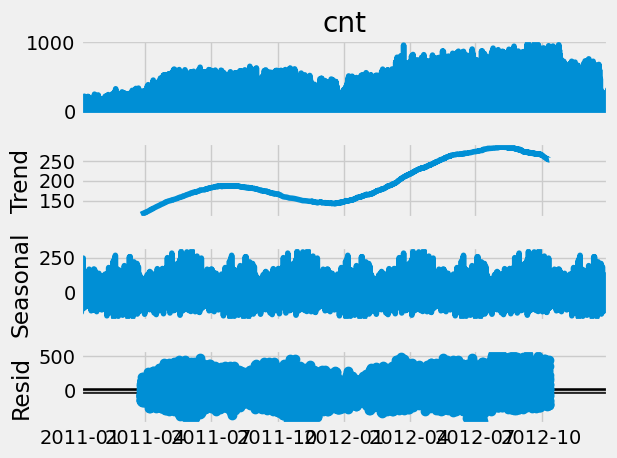

In [190]:
test= df["cnt"]
# test.plot(style='.',
#         figsize=(15,5),
#         color = color_pal[0],
#         title='')
# plt.show()

plt.clf()
# Perform seasonal decomposition
result = seasonal_decompose(test, model='additive', period=(24*160))

# Plot decomposition
result.plot()
plt.show()

In [306]:
feature = df.copy()
feature.reset_index()

feature['lag_1d'] = feature['cnt'].shift(1*24)   # 1 day lag
feature['lag_1w'] = feature['cnt'].shift(7*24)   # 1 week lag
feature['lag_1m'] = feature['cnt'].shift(30*24)  # 1 month lag (approx. 30 days)
feature['lag_1y'] = feature['cnt'].shift(365*24) # 1 year lag


feature['rolling_mean_3d'] = feature['cnt'].rolling(window=3*24).mean()  # Last 3 days rolling mean
feature['rolling_mean_30d'] = feature['cnt'].rolling(window=30*24).mean()  # Last month rolling mean
feature['rolling_mean_same_month_last_year'] = feature['cnt'].shift(365*24).rolling(window=30).mean()  # Same month previous year rolling mean
feature['rolling_mean_same_week_last_year'] = feature['cnt'].shift(365*24).rolling(window=7).mean()  # Same week previous year rolling mean



In [307]:
feature.reset_index().head()

,dteday+hr,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,...,registered,cnt,lag_1w,lag_1m,lag_1y,rolling_mean_3d,rolling_mean_30d,rolling_mean_same_month_last_year,rolling_mean_same_week_last_year,lag_1d
0,2011-01-01 00:00:00,1,2011-01-01,1,0,1,0,0,6,0,...,13,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-01-01 01:00:00,2,2011-01-01,1,0,1,1,0,6,0,...,32,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-01-01 02:00:00,3,2011-01-01,1,0,1,2,0,6,0,...,27,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-01-01 03:00:00,4,2011-01-01,1,0,1,3,0,6,0,...,10,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-01-01 04:00:00,5,2011-01-01,1,0,1,4,0,6,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 640x480 with 0 Axes>

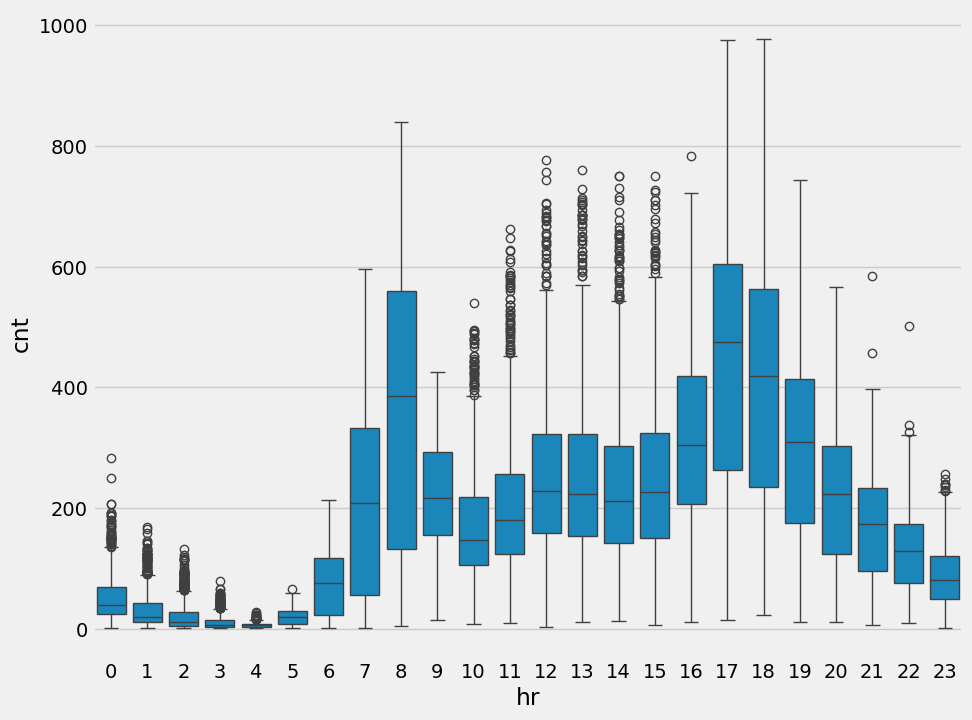

In [308]:
plt.clf()
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=feature, x='hr', y='cnt')
plt.show()

In [309]:
feature.reset_index()
train = feature.loc[(feature['dteday'] > '2011-01-01') & (feature['dteday'] < '2012-06-01')]
test = feature.loc[feature['dteday'] >= '2012-06-01']

In [310]:
train.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,registered,cnt,lag_1w,lag_1m,lag_1y,rolling_mean_3d,rolling_mean_30d,rolling_mean_same_month_last_year,rolling_mean_same_week_last_year,lag_1d
dteday+hr,,,,,,,,,,,,,,,,,,,,,
2011-01-02 00:00:00,25,2011-01-02,1,0,1,0,0,0,0,2,...,13,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
2011-01-02 01:00:00,26,2011-01-02,1,0,1,1,0,0,0,2,...,16,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0
2011-01-02 02:00:00,27,2011-01-02,1,0,1,2,0,0,0,2,...,8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0
2011-01-02 03:00:00,28,2011-01-02,1,0,1,3,0,0,0,2,...,4,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
2011-01-02 04:00:00,29,2011-01-02,1,0,1,4,0,0,0,2,...,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [311]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5096 entries, 2012-06-01 00:00:00 to 2012-12-31 23:00:00
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   instant                            5096 non-null   int64  
 1   dteday                             5096 non-null   object 
 2   season                             5096 non-null   int64  
 3   yr                                 5096 non-null   int64  
 4   mnth                               5096 non-null   int64  
 5   hr                                 5096 non-null   int64  
 6   holiday                            5096 non-null   int64  
 7   weekday                            5096 non-null   int64  
 8   workingday                         5096 non-null   int64  
 9   weathersit                         5096 non-null   int64  
 10  temp                               5096 non-null   float64
 11  atemp               

In [ ]:
FEATURES_LR = [
    'hr', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered',
    ]
TARGET = 'cnt'

X_train_lr = train[FEATURES_LR]
y_train_lr = train[TARGET]

X_test_lr = test[FEATURES_LR]
y_test_lr = test[TARGET]

In [350]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = lr.predict(X_test_lr)

In [351]:
rmse_lr = np.sqrt(mean_squared_error(y_test_lr, y_pred_lr))
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)

print(f"Linear Regression - RMSE: {rmse_lr}")
print(f"Linear Regression - MAE: {mae_lr}")

Linear Regression - RMSE: 200.95797950945322
Linear Regression - MAE: 159.54804224456615


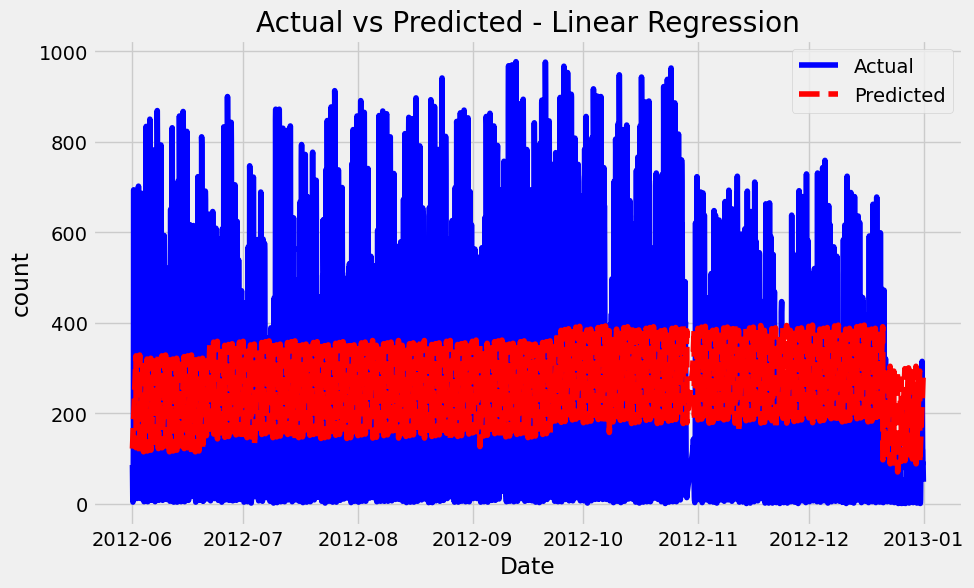

In [352]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test_lr.index, y_test_lr, label='Actual', color='blue')
plt.plot(y_test_lr.index, y_pred_lr, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted - Linear Regression')
plt.xlabel('Date')
plt.ylabel('count')
plt.legend()
plt.show()

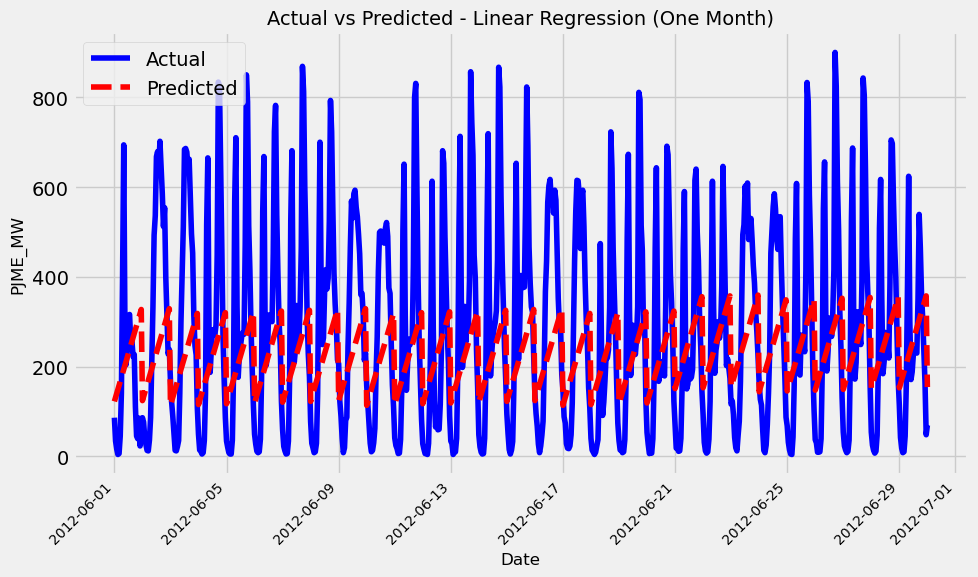

In [353]:
# Define the start and end date of the month interested in
# For example, let's take the first month from the test data range
start_date = y_test_lr.index[0].replace(day=1)  # Start of the month
end_date = (start_date + pd.DateOffset(months=1)) - pd.Timedelta(days=1)  # End of the month

# Filter for the month
y_test_month = y_test_lr.loc[start_date:end_date]

# Ensure y_pred_lr is a pandas series with the same index as y_test
y_pred_lr_series = pd.Series(y_pred_lr, index=y_test_lr.index)

# Now filter the predictions for the same month
y_pred_lr_month = y_pred_lr_series.loc[start_date:end_date]

# Plot actual vs predicted for one month
plt.figure(figsize=(10, 6))
plt.plot(y_test_month.index, y_test_month, label='Actual', color='blue')
plt.plot(y_test_month.index, y_pred_lr_month, label='Predicted', color='red', linestyle='dashed')
plt.title('Actual vs Predicted - Linear Regression (One Month)', fontsize=14)  # Adjust title font size
plt.xlabel('Date', fontsize=12)  # Adjust x-axis label font size
plt.ylabel('PJME_MW', fontsize=12)  # Adjust y-axis label font size
plt.legend()

# Reduce size of x-axis labels and rotate for readability
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust x-axis label font size here

plt.tight_layout()  # Ensure labels don't get cut off
plt.show()
